In [1]:
# Data from statsbomb and using pandas dataframes
import statsbomb as sb
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
import scikitplot as skplt
 
# Machine learning
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Get all competitions
competitions = sb.Competitions()
 
# Get json data
json_data = competitions.data
 
# Convert to dataframe
df = competitions.get_dataframe()

In [3]:
# Showing the competitions
# We will find and pick the data for World Cup 2018
df

,competition_gender,competition_id,competition_name,country_name,match_available,match_updated,season_id,season_name
0,female,37,FA Women's Super League,England,2019-10-20T10:18:13.183,2019-10-20T10:18:13.183,42,2019/2020
1,female,37,FA Women's Super League,England,2019-06-23T15:32:29.914,2019-06-23T15:32:29.914,4,2018/2019
2,male,43,FIFA World Cup,International,2019-06-23T12:38:35.142,2019-06-23T12:38:35.142,3,2018
3,male,11,La Liga,Spain,2019-07-29T20:44:30.861,2019-07-29T20:44:30.861,27,2015/2016
4,male,11,La Liga,Spain,2019-07-30T12:42:05.563,2019-07-30T12:42:05.563,26,2014/2015
5,male,11,La Liga,Spain,2019-07-24T19:44:48.866,2019-07-24T19:44:48.866,25,2013/2014
6,male,11,La Liga,Spain,2019-07-29T17:46:18.935,2019-07-29T17:46:18.935,24,2012/2013
7,male,11,La Liga,Spain,2019-08-27T09:48:17.842,2019-08-27T09:48:17.842,23,2011/2012
8,male,11,La Liga,Spain,2019-08-01T17:44:54.870,2019-08-01T17:44:54.870,22,2010/2011
9,male,11,La Liga,Spain,2019-07-11T07:44:14.533,2019-07-11T07:44:14.533,21,2009/2010


In [4]:
# Get all World Cup matches
wc_matches = sb.Matches(event_id = '43', season_id = '3').get_dataframe()

In [5]:
# Show the World Cup games
wc_matches.head()

,away_score,away_team,competition,competition_stage,home_score,home_team,kick_off,last_updated,match_date,match_id,match_status,match_week,metadata,referee,season,stadium
0,0,782,43,"{'id': 15, 'name': 'Semi-finals'}",1,771,20:00:00.000,2019-06-23T12:36:43.368,2018-07-10,8655,available,2,{'data_version': '1.0.2'},"{'id': 734, 'name': 'A. Cunha'}",3,"{'id': 4726, 'name': 'Saint-Petersburg Stadium'}"
1,0,768,43,"{'id': 25, 'name': '3rd Place Final'}",2,782,16:00:00.000,2019-06-23T12:38:35.142,2018-07-14,8657,available,1,{'data_version': '1.0.2'},"{'id': 741, 'name': 'A. Faghani'}",3,"{'id': 248, 'name': 'Saint Petersburg', 'count..."
2,1,772,43,"{'id': 10, 'name': 'Group Stage'}",0,797,20:00:00.000,2019-05-14T08:23:15.306297,2018-06-20,7543,available,2,{'data_version': '1.0.2'},"{'id': 734, 'name': 'A. Cunha'}",3,"{'id': 4258, 'name': 'Kazan Arena', 'country':..."
3,2,784,43,"{'id': 10, 'name': 'Group Stage'}",0,792,16:00:00.000,2019-05-14T08:23:15.306297,2018-06-26,7562,available,3,{'data_version': '1.0.2'},"{'id': 725, 'name': 'S. Karasev'}",3,"{'id': 249, 'name': 'Olimpiyskiy Stadion Fisht..."
4,0,793,43,"{'id': 10, 'name': 'Group Stage'}",2,775,17:00:00.000,2019-05-14T08:23:15.306297,2018-06-22,7549,available,2,{'data_version': '1.0.2'},"{'id': 739, 'name': 'M. Conger'}",3,"{'id': 4257, 'name': 'Volgograd Arena', 'count..."


In [6]:
# But we want to focus on shots and goals
# Create a list of all match ids for the matches in the 2018 World Cup 
match_list = wc_matches['match_id'].tolist()
 
# Create an empty dataframe to add all shots
shots_df = pd.DataFrame()
 
# Loop through and add all shots from every match to the empty dataframe
for i in match_list:
    events = sb.Events(event_id=str(i))
    shot = events.get_dataframe(event_type='shot')
    shots_df = shots_df.append(shot)

In [7]:
# Details on our data
print(len(shots_df), "is the total number of shots from every match at the 2018 World Cup!")
print("--------------------")
 
print("Columns:")
print(list(shots_df))
print("--------------------")
 
print("Unique values:")
print(shots_df['type'].unique())
print("--------------------")
 
print("Unique values in the 'play_pattern' column:")
print(shots_df['play_pattern'].unique())

1706 is the total number of shots from every match at the 2018 World Cup!
--------------------
Columns:
['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'possession_team', 'play_pattern', 'off_camera', 'team', 'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg', 'key_pass_id', 'body_part', 'type', 'outcome', 'technique', 'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y', 'end_location_z']
--------------------
Unique values:
['Open Play' 'Free Kick' 'Penalty']
--------------------
Unique values in the 'play_pattern' column:
['Regular Play' 'From Throw In' 'From Corner' 'From Free Kick'
 'From Counter' 'From Goal Kick' 'From Kick Off' 'Other' 'From Keeper']


In [8]:
# Remove penalties from the data since they are misleading in our analysis of shots
np_shots = shots_df[shots_df['type'] != 'Penalty']

In [9]:
# Create a goal column, where 1 = goal and 0 = no goal
np_shots['goal'] = np.where(np_shots['outcome'] == 'Goal', 1, 0)

/Users/SaeJin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# Show data
np_shots.head()

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z,goal
0,shot,e33fea6f-1c7e-41b0-8526-fcc5e0fbe3aa,698,1,00:14:59.800,14,59,25,Belgium,Regular Play,...,None,None,None,None,109.0,23.0,120.0,46.3,0.2,0
1,shot,98f8c815-5d4a-4a71-bf1a-5e0d287b2437,786,1,00:17:45.600,17,45,30,France,From Throw In,...,None,None,None,None,92.0,38.0,117.0,38.1,1.6,0
2,shot,6af02b71-85f3-4061-b9d6-7478d099d4bb,819,1,00:18:32.760,18,32,32,Belgium,Regular Play,...,None,None,None,None,107.0,21.0,116.0,39.0,NaN,0
3,shot,a2299393-0163-45bc-ab77-fdbf91b8c426,909,1,00:21:00.320,21,0,36,Belgium,From Corner,...,None,None,None,None,105.0,41.0,119.0,36.6,1.7,0
4,shot,8f91c4c0-704c-4a08-937c-ff2510d4e218,958,1,00:22:41.960,22,41,38,France,Regular Play,...,None,None,None,None,103.0,48.0,120.0,46.1,0.5,0


In [13]:
# Calculating average shot conversion rate
attempts = len(np_shots)
goals = sum(np_shots['goal'])
misses = attempts - goals
conversion_rate = goals / attempts
print('Average conversion rate: ',round(conversion_rate*100,2),"%")

Average conversion rate:  8.24 %


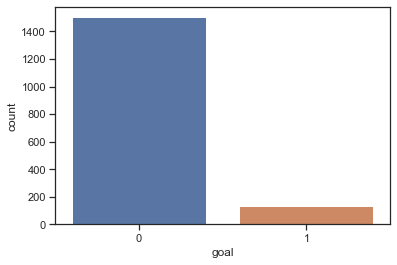

In [14]:
# Show graph
# We see that most shots end up not being being a goal
sns.set(style="ticks", color_codes=True)
sns.countplot(x="goal", data=np_shots)